In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import anndata 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential

In [4]:
model = tf.keras.models.load_model('../Protien_model.cnn/')

Load Data -2700 cells 

Get Model shape

In [95]:
predict = np.argmax(model.predict(adata_test),axis=1)

17/17 [==============================] - 1s 73ms/step


In [96]:
print(predict.shape)

(540,)


In [97]:
y_true = adata_y_test

In [114]:
np.savetxt('test.csv', predict, delimiter=',')

In [98]:
print(y_true.shape)

(540,)


In [1]:
cm = confusion_matrix(y_true, predict)

NameError: name 'confusion_matrix' is not defined

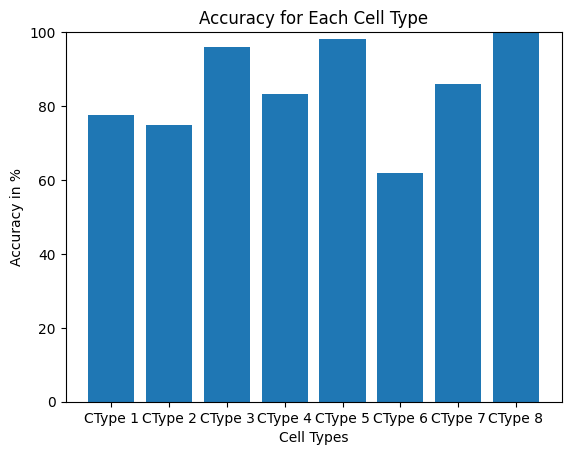

<Figure size 640x480 with 0 Axes>

In [59]:
# Calculate accuracy for each cell type
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
for i in range(len(class_accuracy)):
    class_accuracy[i] = class_accuracy[i] *100
cell_types = ['CType 1', 'CType 2', 'CType 3','CType 4','CType 5','CType 6','CType 7','CType 8']

# Plotting
plt.bar(cell_types, class_accuracy)
plt.xlabel('Cell Types')
plt.ylabel('Accuracy in %')
plt.title('Accuracy for Each Cell Type')
plt.ylim([0, 100]) 
plt.show()
plt.savefig('Model Accuracy')

In [60]:
print(cm)

[[79 15  0  4  2  2  0  0]
 [20 83  0  4  3  1  0  0]
 [ 0  0 71  0  0  1  2  0]
 [ 4  4  0 65  0  5  0  0]
 [ 0  0  0  0 55  1  0  0]
 [12  2  0 11  1 42  0  0]
 [ 0  0  6  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  8]]


In [37]:
df = pd.DataFrame(cm)
df.to_csv('Confusion_Matrix.csv',index=False)